In [3]:
#importing the req. libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#loading the titanic dataset and understanding it's shape
df = pd.read_csv("tested.csv")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
#finding the columns with null values
[features for features in df.columns if df[features].isnull().sum() > 0]

['Age', 'Fare', 'Cabin']

In [ ]:
# Handling the columns with null values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)


                missing values  missing percentage
PassengerId                  0                 0.0
Survived                     0                 0.0
Pclass                       0                 0.0
Name                         0                 0.0
Sex                          0                 0.0
Age                          0                 0.0
SibSp                        0                 0.0
Parch                        0                 0.0
Ticket                       0                 0.0
Fare                         0                 0.0
Embarked                     0                 0.0
Survived_Label               0                 0.0


<Axes: >

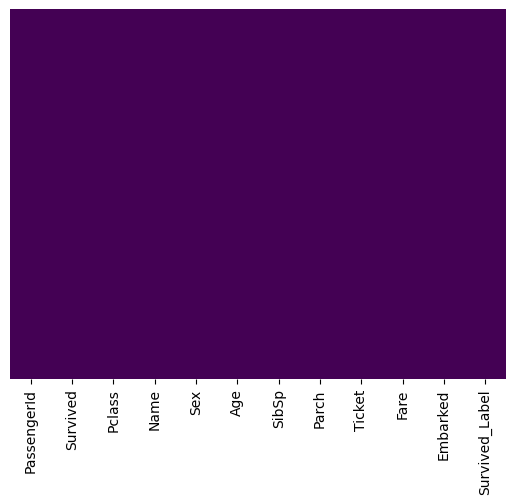

In [38]:
#using heatmap to re-check any null values (probably none :) ) 
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df) ) * 100
missing_data = pd.DataFrame({
    'missing values' : missing_count,
    'missing percentage': missing_percentage
})
missing_data = missing_data.sort_values(by='missing values', ascending=False)
print(missing_data)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

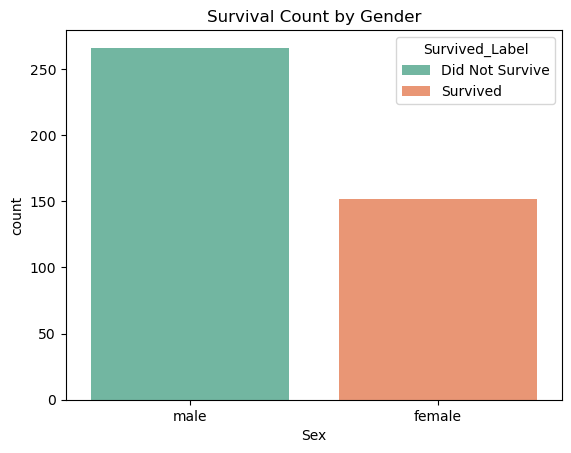

In [46]:
#survival distribution by gender using countplot
sns.countplot(data=df, x="Sex", hue="Survived_Label", palette="Set2")
plt.title("Survival Count by Gender")
plt.show()


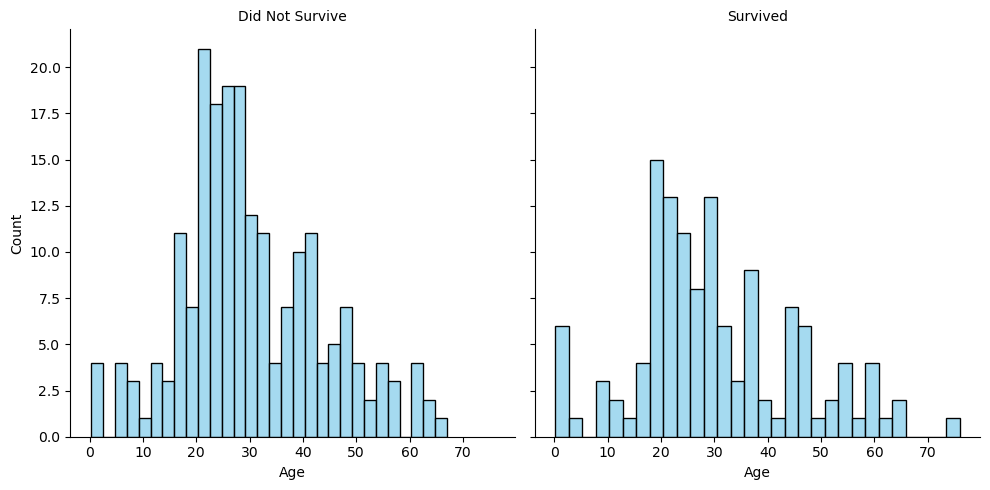

In [33]:
#age distribution between survivors and non survivors using facetgrid

df['Survived_Label'] = df['Survived'].map({0: 'Did Not Survive', 1: 'Survived'})
g = sns.FacetGrid(df, col="Survived_Label", height=5, aspect=1)
g.map_dataframe(sns.histplot, x="Age", bins=30, color="skyblue")
g.set_axis_labels("Age", "Count")
g.set_titles(col_template="{col_name}")
plt.show()



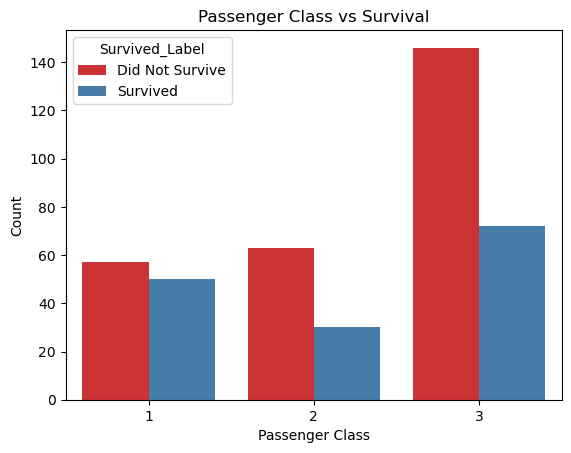

In [47]:
sns.countplot(data=df, x='Pclass', hue='Survived_Label', palette='Set1')
plt.title('Passenger Class vs Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


C:\Users\Home\AppData\Local\Temp\ipykernel_11032\2829326637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=embarked_survival, x='Embarked', y='Survived', palette='coolwarm')


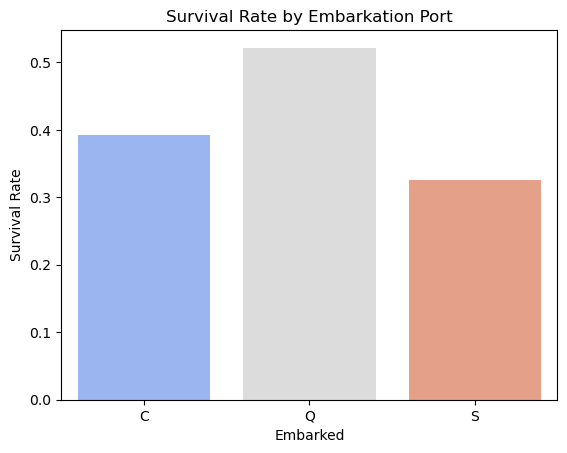

In [48]:
embarked_survival = df.groupby('Embarked')['Survived'].mean().reset_index()
sns.barplot(data=embarked_survival, x='Embarked', y='Survived', palette='coolwarm')
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()


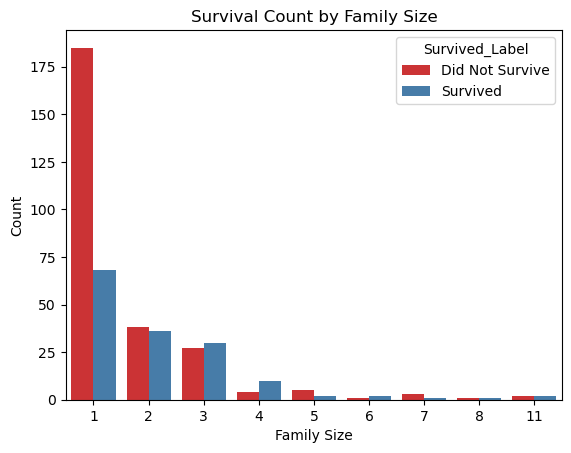

C:\Users\Home\AppData\Local\Temp\ipykernel_11032\1038318434.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=family_survival, x='FamilySize', y='Survived', palette='coolwarm')


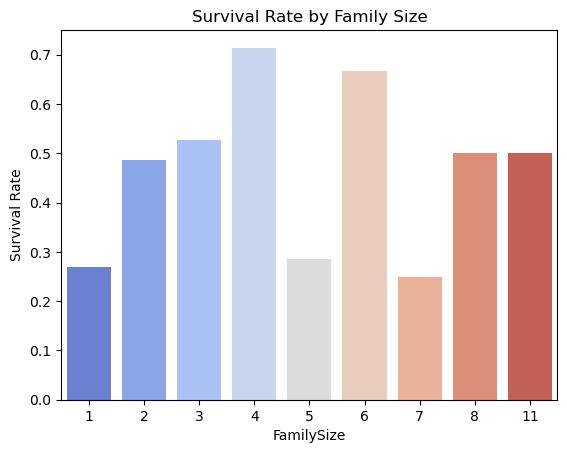

In [50]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves
sns.countplot(data=df, x='FamilySize', hue='Survived_Label', palette='Set1')
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

In [54]:
print("🚢 Titanic Dataset EDA Summary:")
print("- Females had a much higher survival rate than males.")
print("- Passengers in first class (Pclass=1) were more likely to survive.")
print("- Younger passengers tended to survive more often.")
print("- Passengers who paid higher fares had better survival chances.")
print("- Traveling with family increased survival odds up to a certain family size.")
print("- Missing data was mostly in Age and Cabin; Cabin was dropped due to too many missing values.")


🚢 Titanic Dataset EDA Summary:
- Females had a much higher survival rate than males.
- Passengers in first class (Pclass=1) were more likely to survive.
- Younger passengers tended to survive more often.
- Passengers who paid higher fares had better survival chances.
- Traveling with family increased survival odds up to a certain family size.
- Missing data was mostly in Age and Cabin; Cabin was dropped due to too many missing values.
